In [67]:
from pandas.io.formats.format import TextAdjustment
from pandas.io.common import TextIOBase
import nltk

nltk.download('gutenberg')
from nltk.corpus import gutenberg

ids = gutenberg.fileids()
print(ids)

texts = []

for text_id in ids:
  texts.append(gutenberg.raw(text_id))

print(len(texts))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
18


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [28]:
from gensim.parsing.preprocessing import remove_stopwords
import string


def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    return text


for i in range (len(texts)):
  texts[i] = preprocess_text(remove_stopwords(texts[i]))


leaves grass walt whitman 1855 come said soul verses body let write return long long spheres group mates chants resuming tallying earths soil trees winds tumultuous waves pleasd smile verses owningas signing soul body set walt whitman book inscriptions onesself sing onesself sing simple separate person utter word democratic word enmasse physiology toe sing physiognomy brain worthy muse form complete worthier far female equally male sing life immense passion pulse power cheerful freest action formd laws divine modern man sing ponderd silence ponderd silence returning poems considering lingering long phantom arose distrustful aspect terrible beauty age power genius poets old lands directing like flame eyes finger pointing immortal songs menacing voice singest thou said knowst thou hut theme everenduring bards theme war fortune battles making perfect soldiers answerd haughty shade sing war longer greater waged book varying fortune flight advance retreat victory deferrd wavering methinks c

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

bow_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()

print(bow_matrix.toarray())
print(feature_names)

print(bow_matrix.shape[0])


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.00174737 0.        ]]
['00' '00021053' '00081429' ... 'zurishaddai' 'zuyder' 'zuzims']
18


In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 10.0)
X_tsne = tsne.fit_transform(bow_matrix.toarray())

print(X_tsne)
print(X_tsne.shape[0])
print(X_tsne.shape[1])

[[ 12.201783  -31.975712 ]
 [ 14.475675   -8.180229 ]
 [ 35.295612  -22.987316 ]
 [ 13.58265    67.41923  ]
 [ 13.876681   27.164581 ]
 [-20.766867    1.34386  ]
 [-41.873253   16.374718 ]
 [-16.337421  -44.193855 ]
 [-53.085197  -11.759544 ]
 [-29.064943  -17.711927 ]
 [-44.77276   -37.79955  ]
 [ -8.08556   -15.989456 ]
 [-27.806261   44.43873  ]
 [  9.644281   47.87249  ]
 [ 57.161736   58.62648  ]
 [ 69.07334    39.229443 ]
 [ 51.267456   37.673084 ]
 [ -6.0153856  37.30767  ]]
18
2


In [63]:
import matplotlib.pyplot as plt
X_tsne_T = X_tsne.T

x_vals = X_tsne_T[:][0]
y_vals = X_tsne_T[:][1]






In [64]:
y_vals

array([-31.975712,  -8.180229, -22.987316,  67.41923 ,  27.164581,
         1.34386 ,  16.374718, -44.193855, -11.759544, -17.711927,
       -37.79955 , -15.989456,  44.43873 ,  47.87249 ,  58.62648 ,
        39.229443,  37.673084,  37.30767 ], dtype=float32)

In [65]:
x_vals


array([ 12.201783 ,  14.475675 ,  35.295612 ,  13.58265  ,  13.876681 ,
       -20.766867 , -41.873253 , -16.337421 , -53.085197 , -29.064943 ,
       -44.77276  ,  -8.08556  , -27.806261 ,   9.644281 ,  57.161736 ,
        69.07334  ,  51.267456 ,  -6.0153856], dtype=float32)

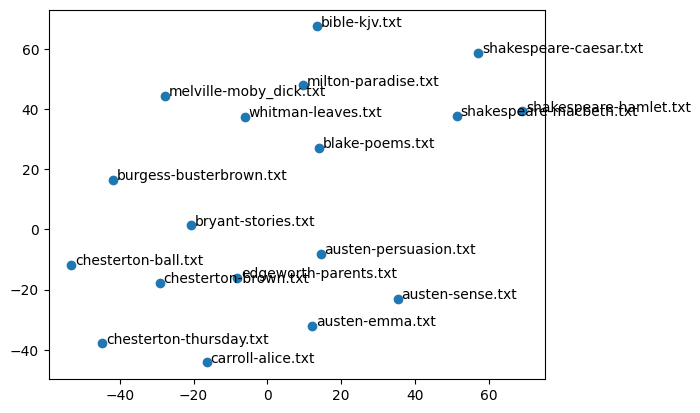

In [72]:
import matplotlib.pyplot as plt

plt.scatter(x = x_vals, y = y_vals)

for i, label in enumerate(ids):
  plt.text(x_vals[i]+1, y_vals[i], label)